In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [198]:
#LECTURE FICHIER SEARCHES
searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
#NOMBRE DE LIGNES DU FICHIER SEARCHES
print("Le fichier contient " + str(searches.shape[0]) + " lignes") 

Le fichier contient 20390198 lignes


In [199]:
#LECTURE FICHIER BOOKINGS
bookings = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/bookings.csv', sep="^", dtype='unicode')
bookings = bookings.dropna(how='any')
#NOMBRE DE LIGNES FICHIER BOOKINGS
print("Le fichier contient " + str(bookings.shape[0]) + " lignes") 

Le fichier contient 10000008 lignes


In [200]:
####  EXERCICE 2
count = bookings['arr_port'].value_counts()
print(count)

LHR         215551
JFK         158930
CDG         149390
LAX         143220
DXB         135640
BKK         130420
MIA         117820
SFO         110970
MNL         109530
ORD          99750
IST          96820
DEL          95570
LAS          93360
HKG          93240
FCO          90880
MAD          89770
MCO          89710
PVG          85960
SYD          79600
SIN          78011
JED          77630
BOM          77150
FRA          76560
BCN          74700
PEK          71120
BOS          69870
DFW          68330
ATL          67310
AMS          66250
MUC          64680
             ...  
KVL             10
PED             10
DLZ             10
CDV             10
VVZ             10
TUB             10
PNK             10
UTP             10
YZP             10
TGM             10
YZZ             10
KSQ             10
CGD             10
WUS             10
DZN             10
CMW             10
JSY             10
SFJ             10
OSK             10
PBG             10
MCK             10
BQB         

In [201]:
bookings['pax'] = bookings['pax'].astype(int)
nb_arrival = bookings.groupby(['arr_port'])['pax'].sum()
nb_arrival

arr_port
AAB            30
AAE           810
AAL           810
AAN            20
AAQ          1650
AAR           500
ABA            90
ABB            40
ABE           880
ABI           150
ABJ          2600
ABK             0
ABQ          4290
ABR             0
ABS           310
ABT           300
ABV          1950
ABX           300
ABY            90
ABZ          3710
ACA           700
ACC          3810
ACE          1700
ACH            20
ACI            40
ACK           200
ACT           180
ACV           140
ACY           190
ADA           980
            ...  
ZAZ            50
ZBF           110
ZBL            90
ZCL           150
ZCO           490
ZDH            60
ZFQ            40
ZFV           120
ZHA             0
ZIG            40
ZIH           870
ZLN             0
ZLO           500
ZNE          1510
ZNZ           970
ZOS            70
ZQN          1720
ZRH         20190
ZSA            10
ZSE            10
ZTH            50
ZUH            40
ZVE            40
ZVJ            20
Z

In [202]:
nb_arrival=nb_arrival.reset_index().sort_values(['pax'],ascending=False).head(10)
nb_arrival['arr_port'] = nb_arrival['arr_port'].str.slice(0,3)
nb_arrival.head()

,arr_port,pax
1088,LHR,88809
1190,MCO,70930
1050,LAX,70530
1047,LAS,69630
886,JFK,66270


In [203]:
#POINT BONUS

url="https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv"
geobases=pd.read_csv(url, sep="^")
geobases.columns = ['arr_port', 'arr_name','iata2', 'code', 'country', 'long','lat']
geobases['arr_port'] = geobases['arr_port'].str.slice(0,3)
geobases = geobases.drop('code',1)
geobases = geobases.drop('iata2',1)
geobases = geobases.drop('long',1)
geobases = geobases.drop('lat',1)
geobases.head()

,arr_port,arr_name,country
0,AZI,Abu Dhabi Bateen Airport,United Arab Emirates
1,AAN,Al Ain International Airport,United Arab Emirates
2,DXB,Dubai International Airport,United Arab Emirates
3,FJR,Fujairah,United Arab Emirates
4,RKT,Ras Al Khaimah International Airport,United Arab Emirates


In [204]:
nb_arrival.merge(geobases, how="left")

,arr_port,pax,arr_name,country
0,LHR,88809,London Heathrow Airport,United Kingdom
1,MCO,70930,Orlando International Airport,United States
2,LAX,70530,Los Angeles International Airport,United States
3,LAS,69630,McCarran International Airport,United States
4,JFK,66270,John F Kennedy International Airport,United States
5,CDG,64490,Paris - Charles-de-Gaulle,France
6,BKK,59460,Suvarnabhumi,Thailand
7,MIA,58150,Miami International Airport,United States
8,SFO,58000,San Francisco International Airport,United States
9,DXB,55590,Dubai International Airport,United Arab Emirates


In [205]:
##### EXERCICE 3

searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
searches = searches.dropna(how='any')
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
571,2013-01-01,23:39:44,FXX,420f3e844817b642c924b71358a04746,GB,FCO,PMO,1,6,FCO,...,FCO,2013-06-24,SQ,Y,1ASI,0,0,0,860f530b5891323b10af779731232ecd,LON
837,2013-01-01,14:40:45,FXX,420f3e844817b642c924b71358a04746,GB,MXP,GYE,1,6,MXP,...,MXP,2013-01-11,KK,L,1ASI,0,0,0,c04870ea7cf837caad2be8fdd1cec84e,LON
964,2013-01-01,13:05:51,FXX,a3ab256abb78596dad0f7a49091a9829,GB,BHX,HFE,1,6,BHX,...,BHX,2013-02-17,MK,C,1ASI,0,0,0,1527c6fe130fdbba79269c80d78e31b2,LON
1065,2013-01-02,16:21:37,FXX,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,ORK,YQR,1,6,ORK,...,ORK,2013-01-22,UV,J,1ASI,0,0,0,f1573941e0c272b59462823fcdf702e3,MIL
1066,2013-01-02,18:11:07,FXX,5658cd6848e769c951fbc3c9adcb400e,US,LAX,CNS,0,9,LAX,...,AKL,2013-03-27,BP,J,1ASI,0,0,0,200ef9f9871800970ba2ec0baf371423,BOS


In [209]:
searches['mois'] = searches['Date'].str.slice(0,7)
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,mois
571,2013-01-01,23:39:44,FXX,420f3e844817b642c924b71358a04746,GB,FCO,PMO,1,6,FCO,...,2013-06-24,SQ,Y,1ASI,0,0,0,860f530b5891323b10af779731232ecd,LON,2013-01
837,2013-01-01,14:40:45,FXX,420f3e844817b642c924b71358a04746,GB,MXP,GYE,1,6,MXP,...,2013-01-11,KK,L,1ASI,0,0,0,c04870ea7cf837caad2be8fdd1cec84e,LON,2013-01
964,2013-01-01,13:05:51,FXX,a3ab256abb78596dad0f7a49091a9829,GB,BHX,HFE,1,6,BHX,...,2013-02-17,MK,C,1ASI,0,0,0,1527c6fe130fdbba79269c80d78e31b2,LON,2013-01
1065,2013-01-02,16:21:37,FXX,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,ORK,YQR,1,6,ORK,...,2013-01-22,UV,J,1ASI,0,0,0,f1573941e0c272b59462823fcdf702e3,MIL,2013-01
1066,2013-01-02,18:11:07,FXX,5658cd6848e769c951fbc3c9adcb400e,US,LAX,CNS,0,9,LAX,...,2013-03-27,BP,J,1ASI,0,0,0,200ef9f9871800970ba2ec0baf371423,BOS,2013-01


In [210]:
destination_list = ['AGP','MAD','BCN']
df = searches[searches['Destination'].isin(destination_list)]
df

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,mois
49075,2013-02-19,15:38:11,FXB,3d8e57e3e6214fdbcc643b1a5f1fecdc,AR,MDZ,AGP,1,6,MDZ,...,2013-03-27,VK,Y,1ASI,0,0,0,ef99dfd4e671113d52752724f8157790,MDZ,2013-02
53862,2013-02-23,00:54:09,FXA,7f8c2d9dfe430c2c6b19298dd7e0ff96,US,SMF,MAD,1,6,SMF,...,2013-10-02,KP,P,1ASI,0,0,0,b6524459df4f66375a992708867c26a6,NYC,2013-02
60158,2013-03-02,21:17:31,FXP,8d2a1e767a6c0231e998716660848886,CA,YQM,BCN,1,6,YQM,...,2013-03-26,KM,T,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YYZ,2013-03
81367,2013-03-23,06:02:55,FXP,f01c88dfa559ee70bbe10b6d3de3d47b,US,CVG,MAD,0,8,CVG,...,2013-09-02,SL,J,1ASI,0,0,0,872e3e2656d509ec0bc993d5b33a9c50,LAX,2013-03
94574,2013-04-05,18:16:25,FXA,f01c88dfa559ee70bbe10b6d3de3d47b,US,BOS,MAD,1,6,BOS,...,2013-07-22,DX,J,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX,2013-04
115605,2013-04-26,05:27:04,FXA,7f8c2d9dfe430c2c6b19298dd7e0ff96,US,CLE,MAD,1,6,CLE,...,2013-08-01,LK,Y,1ASI,0,0,0,3cd87bbe1c896b9d538dde9870f6f2fb,NYC,2013-04
131335,2013-05-12,18:17:47,FXB,d08cea8d7062c7019187527f8d4e5620,SA,RUH,AGP,1,6,RUH,...,2013-07-10,OU,F,1ASI,0,0,0,bbfc00ae550e3bc2fdc9227911b712c7,RUH,2013-05
149980,2013-05-30,20:48:59,FXL,efded789ea68ad21feca23dcb489f60a,EC,UIO,MAD,1,6,UIO,...,2013-08-06,KG,C,1ASI,0,0,0,cc7570f2ee2e1b0e0ed30ea4a6512ff8,ATF,2013-05
151212,2013-06-01,00:32:02,FXA,f01c88dfa559ee70bbe10b6d3de3d47b,US,IAH,MAD,1,6,IAH,...,2013-07-31,FK,F,1ASI,0,0,0,ff8647850b5f11f04ca71fe1b644cf6f,LAX,2013-06
155235,2013-06-05,00:00:38,FXA,7f8c2d9dfe430c2c6b19298dd7e0ff96,US,TPA,BCN,1,6,TPA,...,2013-07-03,UV,J,1ASI,0,0,0,94334a7bcedb6ad631b5fff15fe12586,NYC,2013-06


In [211]:
import matplotlib.pyplot as plt

graph = df.groupby(['mois','Destination'])['Destination'].count()

graph

mois     Destination
2013-02  AGP             57
         MAD             57
2013-03  BCN             57
         MAD             57
2013-04  MAD            114
2013-05  AGP             57
         MAD             57
2013-06  BCN            114
         MAD             57
2013-07  BCN            171
         MAD             57
2013-08  BCN            114
2013-09  MAD            114
2013-10  MAD             57
2013-11  MAD             56
2013-12  BCN             56
         MAD            112
Name: Destination, dtype: int64

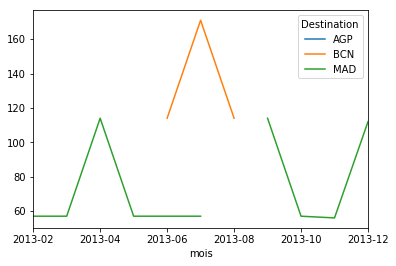

In [226]:
graph.unstack().plot()

In [2]:
###### EXERCICE 4

import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline


bookings = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/bookings.csv', sep="^", dtype='unicode')
bookings = bookings.dropna(how='any')

searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
searches = searches.dropna(how='any')

In [5]:
searches.head()
df1 = searches[["Date", "Country", "Origin", "Destination"]]
df1.head()

,Date,Country,Origin,Destination
571,2013-01-01,GB,FCO,PMO
837,2013-01-01,GB,MXP,GYE
964,2013-01-01,GB,BHX,HFE
1065,2013-01-02,IT,ORK,YQR
1066,2013-01-02,US,LAX,CNS


In [8]:
bookings.rename(columns={'act_date           ':'Date'}, inplace=True)
bookings['Date'] = bookings['Date'].astype(str)
bookings['Date'] = bookings['Date'].str.slice(0,10)
df2 = bookings[["Date", "pos_ctry", "dep_port", "arr_port"]]

df2.head()

,Date,pos_ctry,dep_port,arr_port
0,2013-03-05,DE,ZRH,LHR
1,2013-03-26,US,SAL,CLT
2,2013-03-26,US,SAL,CLT
3,2013-03-26,AU,AKL,SVO
4,2013-03-26,AU,AKL,SVO


In [ ]:
df1.merge(df2, how="left")